___
# Ciência dos Dados - PROJETO 2

___
## Bruno Kaczelnik

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [56]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\PCDELL\Desktop\insper\CDD\projeto 2


Abrindo os arquivos:

In [3]:
dados = pd.read_excel('spamham2019.xlsx')

In [4]:
dados.head()

,Email,Class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
print('O arquivo contem {0} linhas e {1} colunas'.format(dados.shape[0],dados.shape[1]))

O arquivo contem 5572 linhas e 2 colunas


In [6]:
teste,treinamento = train_test_split(dados, test_size=0.75)

In [7]:
teste.shape

(1393, 2)

In [8]:
treinamento.shape

(4179, 2)

In [9]:
treinamento.head()

,Email,Class
396,Was actually sleeping and still might when u c...,ham
4040,Please call our customer service representativ...,spam
1106,"Good afternoon, my love. How goes your day ? W...",ham
4921,Hi Dear Call me its urgnt. I don't know whats ...,ham
238,"New Theory: Argument wins d SITUATION, but los...",ham


In [10]:
teste.head()

,Email,Class
2741,No * am working on the ringing u thing but hav...,ham
1859,"It could work, we'll reach a consensus at the ...",ham
5317,"K, fyi I'm back in my parents' place in south ...",ham
2614,2marrow only. Wed at &lt;#&gt; to 2 aha.,ham
4266,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...,ham


___
## 3. Classificador Naive-Bayes

Criando um limpador para os textos:

In [11]:
def limpador (texto):
    texto=texto.replace('!','')
    texto=texto.replace('@','')
    texto=texto.replace('#','')
    texto=texto.replace('$','')
    texto=texto.replace('%','')
    texto=texto.replace('^','')
    texto=texto.replace('(','')
    texto=texto.replace('*','')
    texto=texto.replace(')','')
    texto=texto.replace('+','')
    texto=texto.replace('=','')
    texto=texto.replace('_','')
    texto=texto.replace('-','')
    texto=texto.replace(':','')
    texto=texto.replace(';','')
    texto=texto.replace('"','')
    texto=texto.replace("'",'')
    texto=texto.replace(',','')
    texto=texto.replace('>','')
    texto=texto.replace('.',' ')
    texto=texto.replace('?','')
    texto=texto.replace('/','')
    texto=texto.replace('[','')
    texto=texto.replace(']','')
    texto=texto.replace('{','')
    texto=texto.replace('}','')
    texto=texto.replace('|','')
    texto=texto.replace('`','')
    texto=texto.replace('*','')
    texto=texto.replace('&','')   
    texto=texto.replace('\ ','')
    texto=texto.upper()
    return texto.split()          

Testando o limpador:

In [12]:
print(limpador('eu estou testando * este limp&ador e vend&o se ele funciona!!!'))

['EU', 'ESTOU', 'TESTANDO', 'ESTE', 'LIMPADOR', 'E', 'VENDO', 'SE', 'ELE', 'FUNCIONA']


Vendo a porcentagem de ham e spam na base de treinamento:

In [13]:
treinamento_spam=treinamento[treinamento.Class=='spam']
treinamento_ham=treinamento[treinamento.Class=='ham']
total_de_treinamento=treinamento.shape[0]
quantidade_de_spam=treinamento_spam.shape[0]
quantidade_de_ham=treinamento_ham.shape[0]
porcentagem_total=total_de_treinamento/total_de_treinamento
porcentagem_spam=quantidade_de_spam/total_de_treinamento
porcentagem_ham=quantidade_de_ham/total_de_treinamento

print('total do teinamento ={0}  {1}%'.format(total_de_treinamento,porcentagem_total*100))
print('quantidade de spam  ={0}   {1:.2f}%'.format(quantidade_de_spam,porcentagem_spam*100))
print('quantidade de ham   ={0}  {1:.2f}%'.format(quantidade_de_ham,porcentagem_ham*100))



total do teinamento =4179  100.0%
quantidade de spam  =555   13.28%
quantidade de ham   =3624  86.72%


Limpando os emails para adicionar as palavras em um futuro dicionario e semparando spam e ham em diferentes lstas:

In [14]:
treinamento_limpo_spam=[]
treinamento_limpo_ham=[]
for texto in treinamento_spam.Email:
    treinamento_limpo_spam.append(limpador(texto))
for texto in treinamento_ham.Email:
    treinamento_limpo_ham.append(limpador(texto))

In [15]:
#print(treinamento_limpo_spam)

In [16]:
#print(treinamento_limpo_ham)

Adicionando cada palavra em dicionarios de ham e spam para contarmos quantas ocorrencias ha de cada palavra :

In [17]:
dic_spam={}
numero_de_palavras_spam=0
for listas in treinamento_limpo_spam:
    for palavra in listas :
        if palavra in dic_spam:
            dic_spam[palavra]+=1
            numero_de_palavras_spam+=1
        else:
            dic_spam[palavra]=1
            numero_de_palavras_spam+=1
            
#print (dic_spam)    
#print(numero_de_palavras_spam)    

In [18]:
dic_ham={}
numero_de_palavras_ham=0
for listas in treinamento_limpo_ham:
    for palavra in listas :
        if palavra in dic_ham:
            dic_ham[palavra]+=1
            numero_de_palavras_ham+=1
        else:
            dic_ham[palavra]=1
            numero_de_palavras_ham+=1
            
total_de_palavras=numero_de_palavras_ham+numero_de_palavras_spam
#print (dic_ham)    
#print(numero_de_palavras_ham)    
#print(total_de_palavras)    

Criando uma funcao para calcular a probabilidade do email ser spam ou ham:

In [19]:
def probabilidade(dicionario,email,prob,numero_de_palavras):
    email_limpo=limpador(email)
    probabilidade=prob
    for palavra in email_limpo:
        if palavra in dicionario:
            probabilidade +=np.log((1+dicionario[palavra])/(total_de_palavras+numero_de_palavras))
        else:
            probabilidade +=np.log(1/(total_de_palavras+numero_de_palavras))
    return probabilidade

Criando um comparador para ver qual pobabilidade e maior e decidir assim se o email se classifica como spam ou ham

In [20]:
def compara_probabilidades(prob_spam,prob_ham):
    if prob_spam>prob_ham:
        return 'spam'
    else:
        return 'ham'

Testando:

In [21]:
email="lats have sex"
x=probabilidade(dic_ham,email,porcentagem_ham,numero_de_palavras_ham)
y=probabilidade(dic_spam,email,porcentagem_spam,numero_de_palavras_spam)
print (compara_probabilidades(y,x))

spam


Criando uma nova coluna na base de dados com os resultados do simulador:

In [57]:
spam_ham=[]
for email in teste['Email']:
    x=probabilidade(dic_ham,email,porcentagem_ham,numero_de_palavras_ham)
    y=probabilidade(dic_spam,email,porcentagem_spam,numero_de_palavras_spam)
    resultado=compara_probabilidades(y,x)
    spam_ham.append(resultado)
teste['Simulador']=spam_ham
teste.head()
pd.set_option('chained_assignment',None)

In [23]:
acerto_erro=[]
lista_Class=[]
lista_Simulador=[]
falso_positivo=0
positivo=0
falso_negativo=0
negativo=0
acerto=0
erro=0
for Class in teste['Class']:
    lista_Class.append(Class)
for Class in teste['Simulador']:
    lista_Simulador.append(Class)
for i in range(len(lista_Class)):
    if lista_Class[i]==lista_Simulador[i]:
        acerto_erro.append('acerto') 
        acerto+=1
        if lista_Class[i]=='ham':
            negativo+=1
        if lista_Class[i]=='spam':
            positivo+=1
    else:
        acerto_erro.append('erro')
        erro+=1
        if lista_Class[i]=='ham':
            falso_positivo+=1
        if lista_Class[i]=='spam':
            falso_negativo+=1

print('acerto:',acerto)
print('erro  :',erro)
print('total :',erro+acerto)
print()
print('positivo      :',positivo)
print('negativo      :',negativo)
print('falso_negativo:',falso_negativo)
print('falso_positivo:',falso_positivo)
print()
print('acuracia:',acerto/(acerto+erro)*100,'%')

acerto: 1344
erro  : 49
total : 1393

positivo      : 150
negativo      : 1194
falso_negativo: 42
falso_positivo: 7

acuracia: 96.4824120603015 %


___
## 4. Qualidade do Classificador alterando a base de treinamento

In [24]:
negativo_=[]
positivo_=[]
falso_positivo_=[]
falso_negativo_=[]
acuracia_=[]

In [58]:
for roda in range (10000):
    teste,treinamento = train_test_split(dados, test_size=0.75)
    
    treinamento_spam=treinamento[treinamento.Class=='spam']
    treinamento_ham=treinamento[treinamento.Class=='ham']
    total_de_treinamento=treinamento.shape[0]
    quantidade_de_spam=treinamento_spam.shape[0]
    quantidade_de_ham=treinamento_ham.shape[0]
    porcentagem_total=total_de_treinamento/total_de_treinamento
    porcentagem_spam=quantidade_de_spam/total_de_treinamento
    porcentagem_ham=quantidade_de_ham/total_de_treinamento
    
    treinamento_limpo_spam=[]
    treinamento_limpo_ham=[]
    for texto in treinamento_spam.Email:
        treinamento_limpo_spam.append(limpador(texto))
    for texto in treinamento_ham.Email:
        treinamento_limpo_ham.append(limpador(texto))
        
    dic_spam={}
    numero_de_palavras_spam=0
    for listas in treinamento_limpo_spam:
        for palavra in listas :
            if palavra in dic_spam:
                dic_spam[palavra]+=1
                numero_de_palavras_spam+=1
            else:
                dic_spam[palavra]=1
                numero_de_palavras_spam+=1
                
    dic_ham={}
    numero_de_palavras_ham=0
    for listas in treinamento_limpo_ham:
        for palavra in listas :
            if palavra in dic_ham:
                dic_ham[palavra]+=1
                numero_de_palavras_ham+=1
            else:
                dic_ham[palavra]=1
                numero_de_palavras_ham+=1
            
    total_de_palavras=numero_de_palavras_ham+numero_de_palavras_spam
    
    spam_ham=[]
    for email in teste['Email']:
        x=probabilidade(dic_ham,email,porcentagem_ham,numero_de_palavras_ham)
        y=probabilidade(dic_spam,email,porcentagem_spam,numero_de_palavras_spam)
        resultado=compara_probabilidades(y,x)
        spam_ham.append(resultado)
    teste['Simulador']=spam_ham
    
    acerto_erro=[]
    lista_Class=[]
    lista_Simulador=[]
    falso_positivo=0
    positivo=0
    falso_negativo=0
    negativo=0
    acerto=0
    erro=0
    for Class in teste['Class']:
        lista_Class.append(Class)
    for Class in teste['Simulador']:
        lista_Simulador.append(Class)
    for i in range(len(lista_Class)):
        if lista_Class[i]==lista_Simulador[i]:
            acerto_erro.append('acerto') 
            acerto+=1
            if lista_Class[i]=='ham':
                negativo+=1
            if lista_Class[i]=='spam':
                positivo+=1
        else:
            acerto_erro.append('erro')
            erro+=1
            if lista_Class[i]=='ham':
                falso_positivo+=1
            if lista_Class[i]=='spam':
                falso_negativo+=1
    acuracia=(acerto/(acerto+erro)*100)
    negativo_.append(negativo)
    positivo_.append(positivo)
    falso_positivo_.append(falso_positivo)
    falso_negativo_.append(falso_negativo)
    acuracia_.append(acuracia)

In [27]:
media_negativo=sum(negativo_)/len(negativo_)
media_positivo=sum(positivo_)/len(positivo_)
media_falso_positivo=sum(falso_positivo_)/len(falso_positivo_)
media_falso_negativo=sum(falso_negativo_)/len(falso_negativo_)
media_acuracia=sum(acuracia_)/len(acuracia_)
print('media negativo             : {:.2f}'.format(media_negativo))
print('media positivo             : {:.2f}'.format(media_positivo))
print('media falso positivo       : {:.2f}'.format(media_falso_positivo))
print('media falso negativo       : {:.2f}'.format(media_falso_negativo))
print()
print('porcentagem negativo       : {:.2f}%'.format((media_negativo*100)/teste.shape[0]))
print('porcentagem positivo       : {:.2f}%'.format((media_positivo*100)/teste.shape[0]))
print('porcentagem falso positivo : {:.2f}%'.format((media_falso_positivo*100)/teste.shape[0]))
print('porcentagem falso negativo : {:.2f}%'.format((media_falso_negativo*100)/teste.shape[0]))

print('media acuracia             : {:.2f}%'.format(media_acuracia))

media negativo             : 1202.47
media positivo             : 147.77
media falso positivo       : 3.88
media falso negativo       : 38.89

porcentagem negativo       : 86.32%
porcentagem positivo       : 10.61%
porcentagem falso positivo : 0.28%
porcentagem falso negativo : 2.79%
media acuracia             : 96.93%


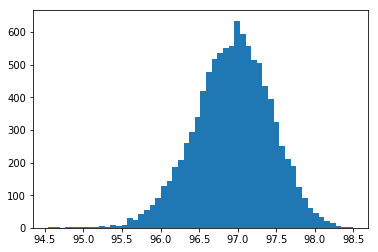

In [54]:
plt.hist(acuracia_, bins=54, label=None);

# Conclusão:

   Podemos afirmar que o classificador Naive Bayes obteve otimos resultados, primeiramente obtendo uma acuracia de 96,48% e 
apos rodarmos o mesmo codigo dez mil vezes , ele obteve uma acuracia media de 96,93%. Ambos os valores , alem de muito proximos, sao resultados que podem ser considerados muito bons.
   Ao plotar um histograma com todas as acuracias obtidas entre as dez mil bases de treinamento diferentes podemos cer que a 
curva se aproxima muito de uma normal com media 96,93 .
   Apos rodarmos o teste as dez mil vezes podemos ver que a maior parte de seus dados sao negativos verdadeiros (ham classificados como ham) com uma media de 1202.47 email's que representam 86.32% do total , segudos de 147.77 email's positivos 
verdadeiros (spam que sao classificados como spam)  representando 10.61% do total , 38.89 email's em media de falsos negativo 
(email's que sao marcados como ham mas na verdade sao spam) representando 2.79% do total e por fim apenas 3.88 falsos positivo
(email's que sao marcados como spam mas na verdade sao ham) representando 0.28% do total.